In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv('reviews.csv',parse_dates = ['Timestamp'])   # parse_dates 把str 看成date
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


###  Average/count rating by day

In [2]:
data['Day'] = data['Timestamp'].dt.date    # dt = datatime , date可以換成 month,time
data.head()
day_average = data.groupby(['Day']).count()       # 'Day' is not a column is index 

day_average.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


In [3]:
test = data.groupby(['Course Name']).count()
test

,Timestamp,Rating,Comment,Day
Course Name,,,,
100 Python Exercises I: Evaluate and Improve Your Skills,1593,1593,231,1593
100 Python Exercises II: Evaluate and Improve Your Skills,280,280,81,280
Data Processing with Python,868,868,117,868
Interactive Data Visualization with Python and Bokeh,767,767,118,767
Learn GIS in One Hour,499,499,119,499
Python for Beginners with Examples,4821,4821,764,4821
The Complete Python Course: Build 10 Professional OOP Apps,470,470,91,470
The Python Mega Course: Build 10 Real World Applications,35702,35702,5278,35702


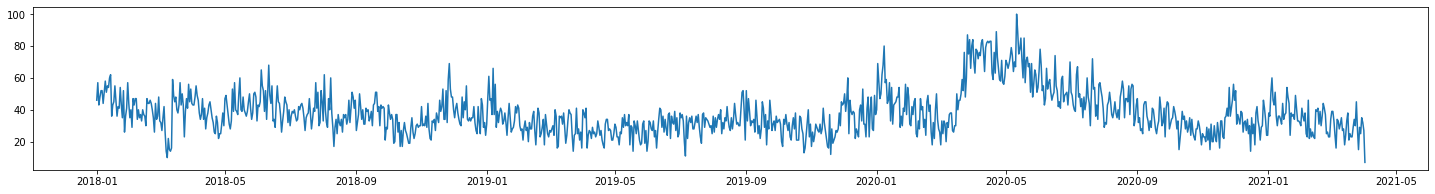

In [4]:
plt.figure(figsize=(25,3))

plt.plot(day_average.index,day_average['Rating'])

### Rating average by week

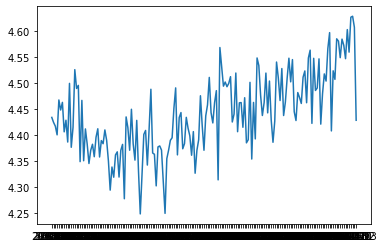

In [5]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')   #strftime = string from time
week_average = data.groupby(['Week']).mean()
week_average

plt.plot(week_average.index,week_average['Rating'])

### Average rating by month

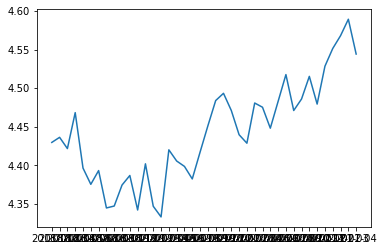

In [9]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')   #strftime = string from time
month_average = data.groupby(['Month']).mean()
month_average

plt.plot(month_average.index,month_average['Rating'])    # month_average.index = 一個list 裡面裝著很多日期

### Average rating by month by course

<AxesSubplot:xlabel='Month'>

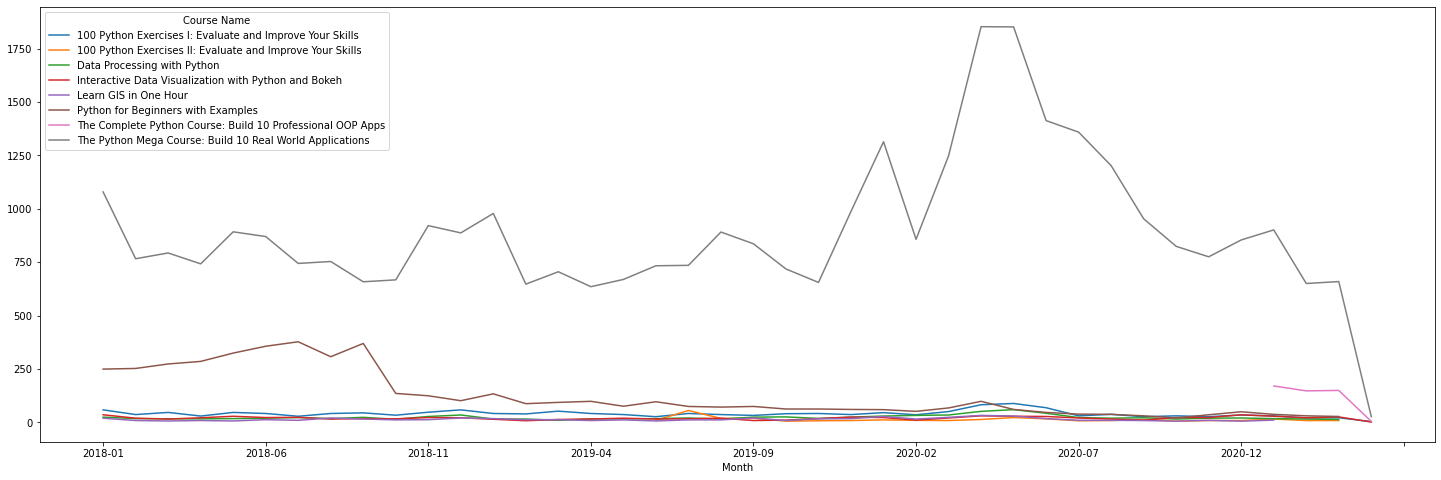

In [33]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_a_crs = data.groupby(['Month','Course Name'])['Rating'].count().unstack()
month_a_crs.plot(figsize=(25,8))

### What day are people the happiest?

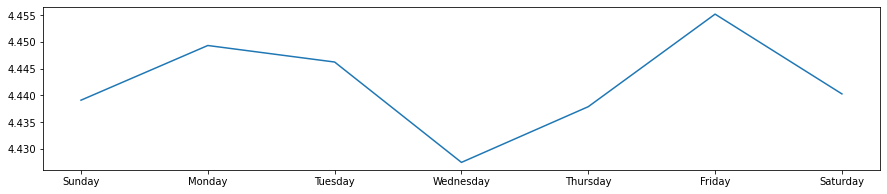

In [57]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_a_dn = data.groupby(['Weekday','Daynumber']).mean()
weekday_a_dn = weekday_a_dn.sort_values('Daynumber')                # .sort_values() 使index由小到大 因為daynumber已經變成time了
#weekday_a_dn

plt.figure(figsize=(15,3))
plt.plot(weekday_a_dn.index.get_level_values(0),weekday_a_dn['Rating'])   # .get_level_values() X軸 只要取一個index 
                                                                          #  weekday_a_dn 中有兩個index 分別是Weekday,Daynumber
                                                                          # 電腦同時讀取兩個的話 會不知道誰要當 X軸
        